# Breast Cancer Prediction

Name: Aarthi L

Phase 1:Golden Task

Project Name: Breast Cancer Prediction

Date: 16/11/2023

# Problem Satatement

The objective of this project is to create a predictive model that can accurately classify breast cancer cases as benign or malignant based on a set of relevant features. By leveraging historical data and applying machine learning techniques, we aim to develop a reliable tool for assisting medical professionals in diagnosing breast cancer.

# Solution

1. Dataset and Data Exploration:
Begin by acquiring a comprehensive dataset that includes relevant features for breast cancer diagnosis.
Conduct exploratory data analysis (EDA) to gain insights into the distribution of features, identify any missing values or outliers, and understand the characteristics of benign and malignant cases.


2. Feature Selection:
Identify and select features that have significant relevance to breast cancer diagnosis. Collaboration with domain experts or utilizing existing medical knowledge can help in this process.


3. Data Preprocessing:
Clean the dataset by handling missing values, outliers, and ensuring data quality.
Standardize or normalize features, especially for algorithms sensitive to scale, like K-Nearest Neighbors (KNN).


4. Model Selection:
Given the binary nature of the classification task, consider using machine learning algorithms suitable for binary classification. K-Nearest Neighbors (KNN) is a valid choice, but you may also explore other algorithms like Support Vector Machines (SVM), Decision Trees, Random Forests, or Logistic Regression.


5. Model Training and Validation:
Split the dataset into training and validation sets.
Train the selected model on the training set and evaluate its performance on the validation set.
Utilize metrics such as accuracy, precision, recall, and F1 score to assess the model's effectiveness.


6. Hyperparameter Tuning:
If using algorithms with hyperparameters (e.g., KNN), perform tuning to optimize model performance. Techniques like cross-validation can assist in finding the best hyperparameter values.


7. Model Interpretability:
Consider the interpretability of the chosen model, especially if the goal is to provide insights to medical professionals. Decision Trees or Logistic Regression may offer more interpretability compared to complex models like neural networks.


8. Communication and Collaboration:
Collaborate with medical professionals to ensure the model aligns with clinical requirements and standards.
Clearly communicate the model's capabilities, limitations, and potential impact on medical decision-making.


9. Ethical Considerations:
Be mindful of ethical considerations regarding patient privacy, informed consent, and the potential implications of model predictions on individuals' lives.


10. Documentation and Deployment:
Document the entire process, including data preprocessing steps, model selection, training details, and evaluation metrics.
If applicable, consider deploying the model in a user-friendly interface for medical professionals, ensuring it aligns with regulatory and ethical standards.

# Dataset:

The dataset is present in the Kaggle:
    https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset/data

# What is Breast Cancer ?

Breast cancer is a malignancy that develops in breast cells, commonly affecting women. It often starts in the milk ducts or lobules. Early detection through screenings and self-exams is crucial for effective treatment. Treatment options include surgery, chemotherapy, radiation, hormone therapy, and targeted therapies. Prognosis varies based on the stage at diagnosis and timely intervention.

# Knowledge about the dataset and the cancer

1.Breast cancer is the most common cancer among women worldwide.
While it can occur at any age, the risk increases with age.


2.Key risk factors include age, family history, genetic mutations (e.g., BRCA1, BRCA2), hormonal factors, and certain lifestyle factors (e.g., alcohol consumption, lack of physical activity).


3.Mammography is a common screening tool for detecting breast cancer in its early stages.
Diagnosis involves imaging tests (mammogram, ultrasound), biopsies, and pathology analysis.


4.Breast cancer is staged based on the size of the tumor, lymph node involvement, and whether it has spread to other parts of the body (metastasis).
Stages range from 0 (non-invasive) to IV (advanced).


5.Survival rates vary based on the stage at diagnosis. Early detection and intervention significantly improve outcomes.



# Let's Code

# Import the necessary libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Read the Dataset

In [8]:
dataset=pd.read_csv("data.csv")

In [9]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Exploratory Data Analysis

In [10]:
dataset.columns #columns of the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
dataset.shape #shape of the data (rows,columns)

(569, 32)

In [12]:
dataset.info #information of the dataset

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [13]:
dataset.dtypes #datatypes of the dataset

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [14]:
dataset.isnull().sum() #check for any NaN value in the dataset

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
dataset["diagnosis"].unique() #check unique value in the feature

array(['M', 'B'], dtype=object)

In [16]:
dataset["diagnosis"].value_counts() #check the count on the feature

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
dataset.head() #give the top 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Visualization

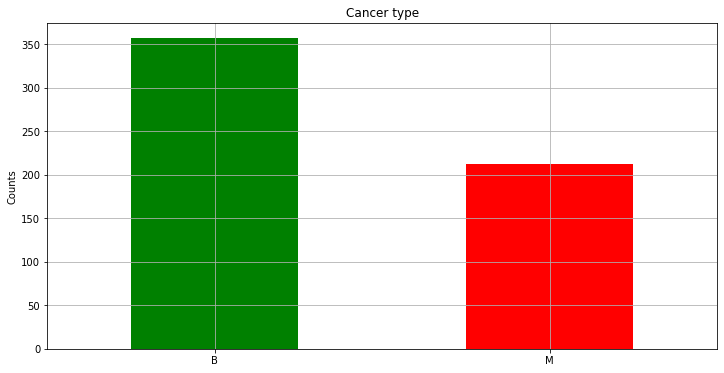

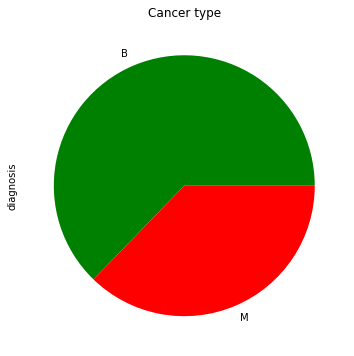

Number of Benign: 357
Number of Malignant: 212


In [20]:
# Getting the value count for the two labels in the diagnosis column
value_count = dataset['diagnosis'].value_counts() 

# Setting the figure size of the plot 
plt.figure(figsize = (12, 6))

# Plotting the Count for the value counts in the diagnosis column
c = ['green', 'red']
value_count.plot(kind = "bar", color = c, rot=0)
plt.ylabel("Counts")
plt.title("Cancer type")
plt.grid(True)
plt.show() 

# Plotting a pie chart of the imbalanced dataset 
value_count.plot(kind = "pie", colors=c, figsize=(12, 6))
plt.title("Cancer type")
plt.show() 

# Printing the number of counts for the values of the labels in the diagnosis column 
B, M = value_count 
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

# Pair plot 

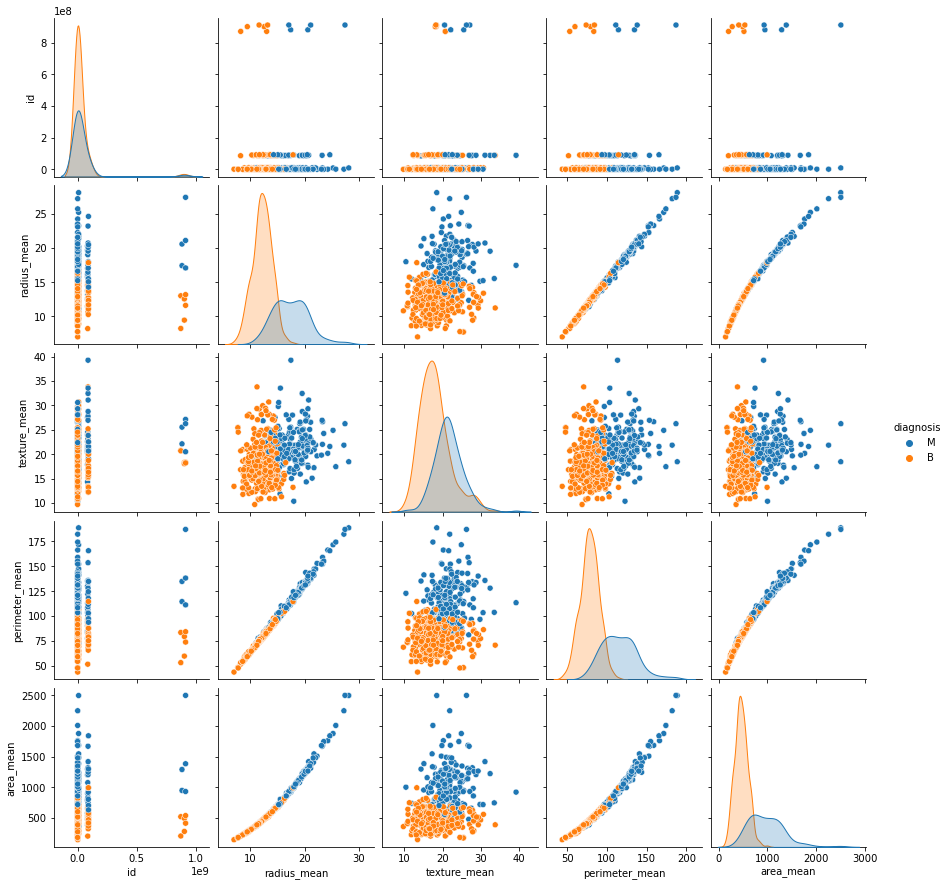

In [22]:
#pair plot to have a concrete visualization of correlation between characteritics of the cancer and the type.
sns.pairplot(dataset.iloc[: ,0:6], hue = 'diagnosis')

# Observations

mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.</br> Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

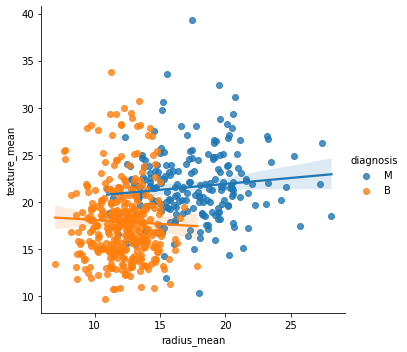

In [24]:
#how does the relationship between two variable chance as fuction of a third variable

sns.lmplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=dataset);

<AxesSubplot:>

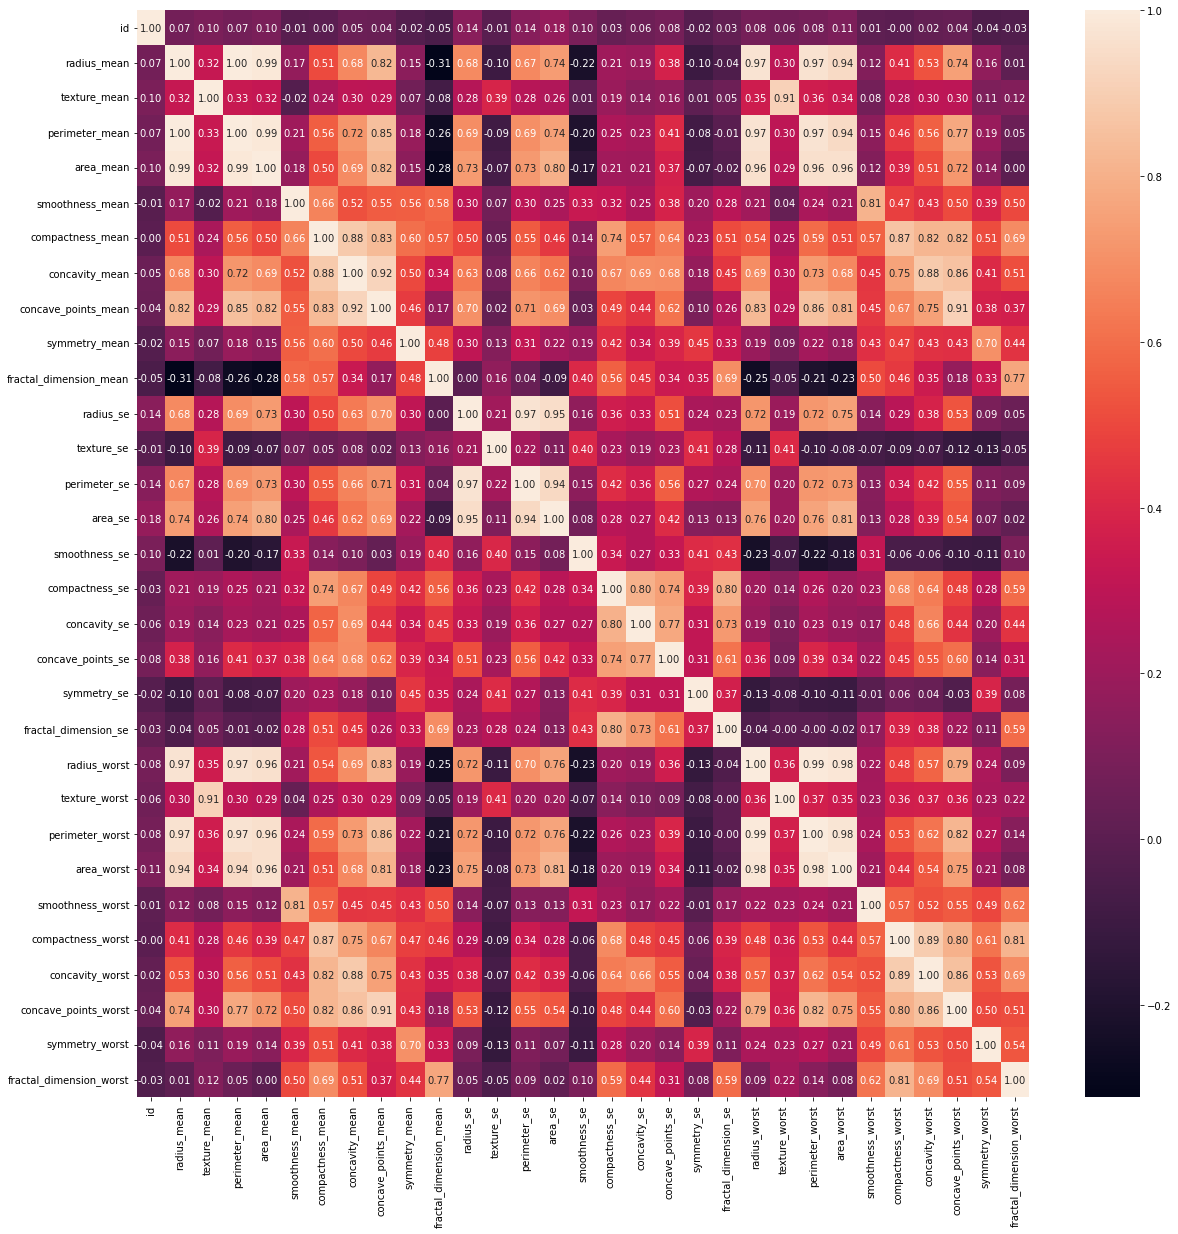

In [26]:
plt.subplots(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot = True, fmt= '.2f')

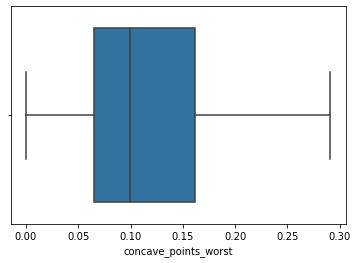

In [27]:
sns.boxplot(dataset["concave_points_worst"]) #check outliers
plt.show()

# Feature Selection

In [28]:
cm=dataset.corr().abs()
cm.style.background_gradient(cmap="coolwarm")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,0.052511,0.143048,0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.012968,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

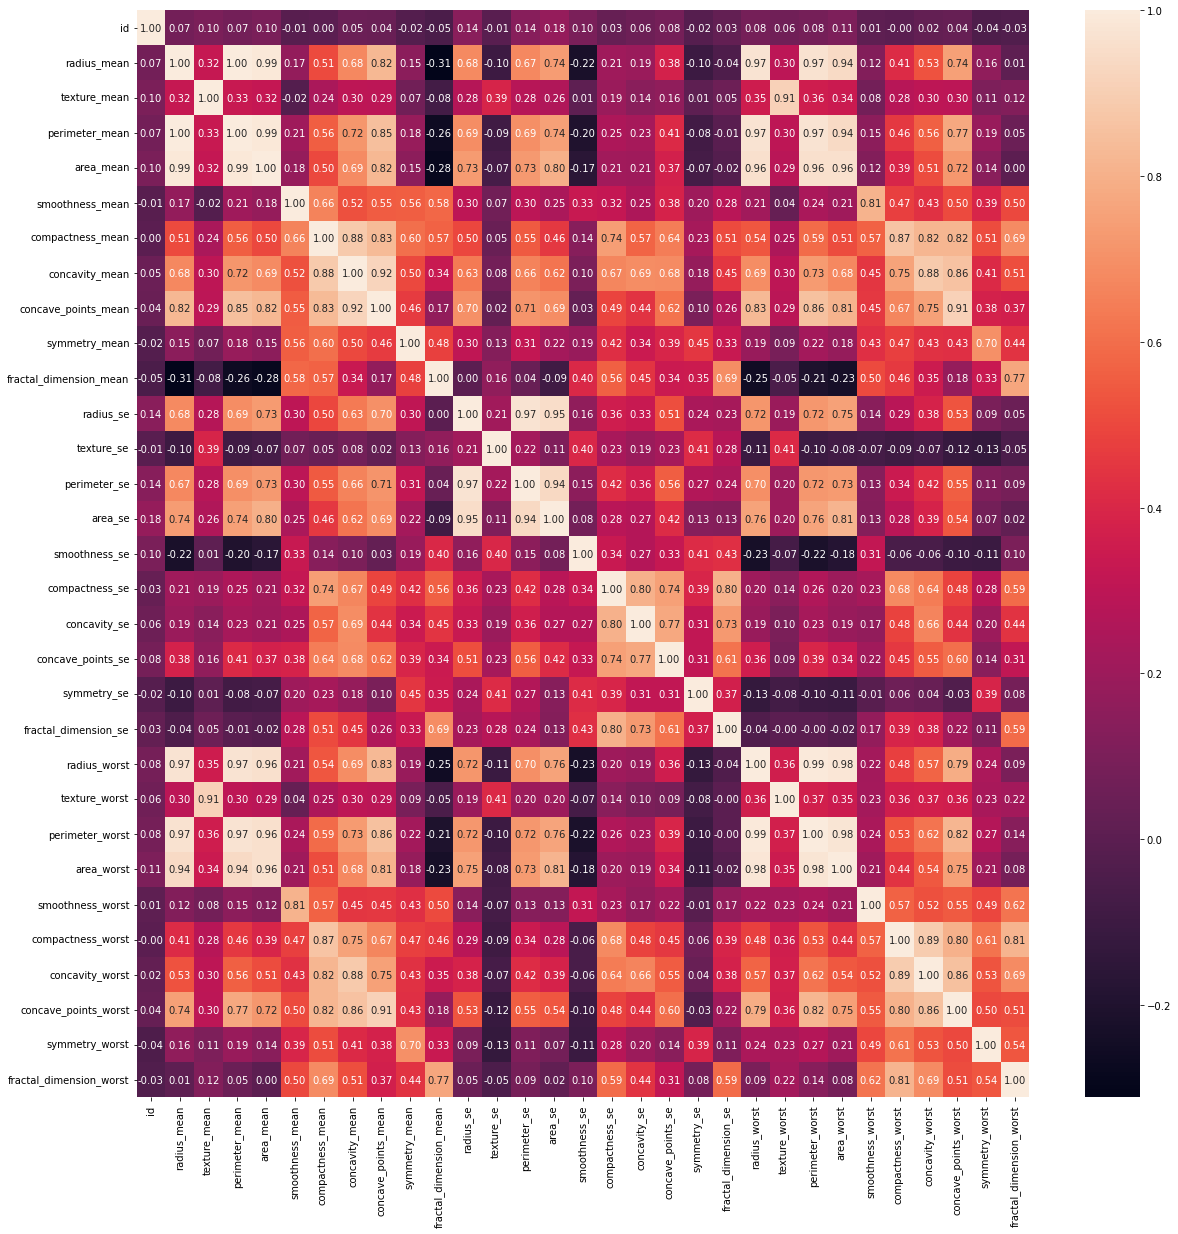

In [29]:
plt.subplots(figsize=(20,20)) #this also correlation but shown in heatmap
sns.heatmap(dataset.corr(),annot=True,fmt=".2f")

In [31]:
remove_cols=["symmetry_se","texture_se","fractal_dimension_mean","id","smoothness_se","fractal_dimension_se"]  #remove low correlation featues
hig_corr=dataset.drop(remove_cols,axis=1)
hig_corr.shape #shape of new dataset

(569, 26)

In [32]:
x=hig_corr.drop("diagnosis",axis=1) # remove output features
x.shape #shape of new dataset

(569, 25)

In [33]:
y=dataset["diagnosis"] #output or target feature
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Scaling or normalizing numerical features

In [35]:
scaler= StandardScaler() #scaling for better accuaracy
x=scaler.fit_transform(x)
x 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Split the train and test data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

# Model selection

In [37]:
# kNearestNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knn.fit(x_train,y_train)

y_predKnn=knn.predict(x_test)

# Cross validation

In [38]:
 #crossvalidation
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
sKnn = cross_validate(estimator=knn,X= x, y=y, scoring=scoring, cv=20)

knn_fit_time = sKnn['fit_time'].mean()
knn_score_time = sKnn['score_time'].mean()
knn_accuracy = sKnn['test_accuracy'].mean()
knn_precision = sKnn['test_precision_macro'].mean()
knn_recall = sKnn['test_recall_macro'].mean()
knn_f1 = sKnn['test_f1_weighted'].mean()
knn_roc = sKnn['test_roc_auc'].mean()

In [39]:
y_predKnn.shape

(114,)

In [40]:
x_test.shape 

(114, 25)

In [41]:
accKnn=accuracy_score(y_test,y_predKnn) #KNC accuracy
accKnn

0.956140350877193

# Model Evaluation

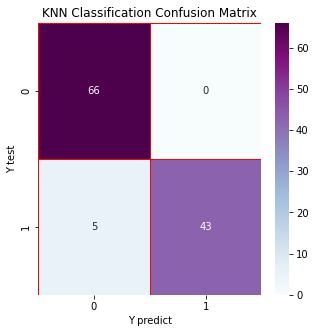

In [47]:
# The confusion matrix
knn_cm = confusion_matrix(y_test, y_predKnn)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [48]:
pd.DataFrame(y_predKnn).value_counts()

B    71
M    43
dtype: int64

In [49]:
y_test.value_counts() #just for verification

B    66
M    48
Name: diagnosis, dtype: int64

# Result

In [51]:
print(f"knn_fit_time:{knn_fit_time}","\n") #After applying cross validate
print(f"knn_score_time :{knn_score_time}","\n")
print(f"knn_accuracy:{knn_accuracy}","\n")
print(f"knn_precision:{knn_precision}","\n")
print(f"knn_recall:{knn_recall}","\n")
print(f"knn_f1:{knn_f1}","\n")
print(f"knn_roc:{knn_roc}","\n")
print("With the help of cross-validation, the model worked more accurately")

knn_fit_time:0.00030661821365356444 

knn_score_time :0.05376400947570801 

knn_accuracy:0.9701354679802956 

knn_precision:0.9739219651177855 

knn_recall:0.963989898989899 

knn_f1:0.9698348221274916 

knn_roc:0.9833184789067143 

With the help of cross-validation, the model worked more accurately


# Conclusion

In conclusion, the K-Nearest Neighbors (KNN) algorithm is a powerful and intuitive machine learning method that can be employed for breast cancer prediction. KNN operates based on the principle of classifying data points by the majority class among their nearest neighbors in the feature space.